# LOESS Smoothing on Stock Price Data

## Objective
The objective of this notebook is to apply LOESS smoothing on stock price data to analyze the effects of different span values. We will identify the optimal span that avoids overfitting or underfitting and compare the performance of linear versus quadratic polynomial smoothing.

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import mean_squared_error

## Step 1: Load and Preprocess Data

In [36]:
# Specify the file path for the dataset
file_path = 'RELI Historical Data.csv'

In [37]:
df = pd.read_csv(file_path)

In [38]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'Price' column to float after removing commas
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort the DataFrame by 'Date'
df.sort_values(by='Date', inplace=True)

## Step 2: Visualize Original Stock Prices
- Create a scatter plot of the original stock prices over time.

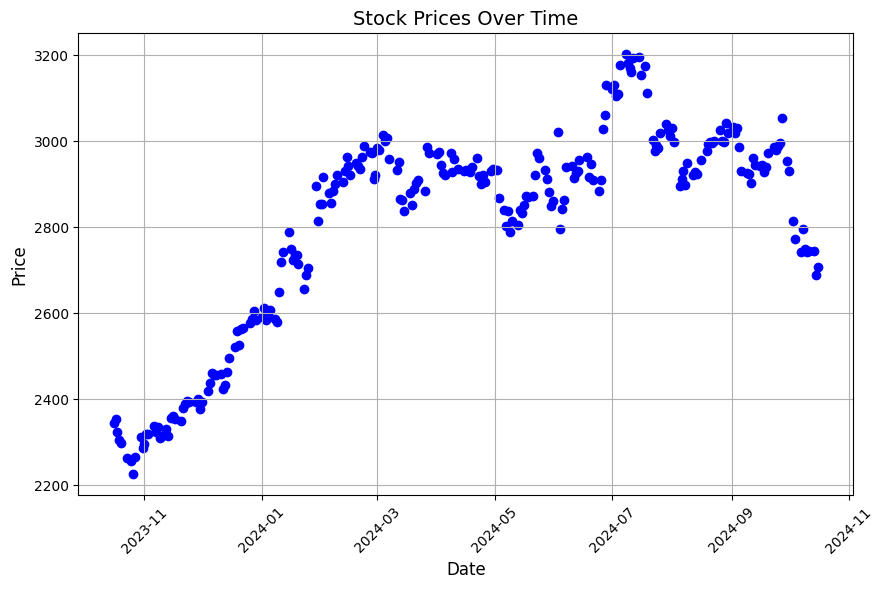

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], color='blue', label='Stock Price')
plt.title('Stock Prices Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## Step 3: Apply LOESS Smoothing
- Test various span values (0.15, 0.30, 0.45, 0.60, 0.75, 0.90).
- Plot original and smoothed prices for each span.

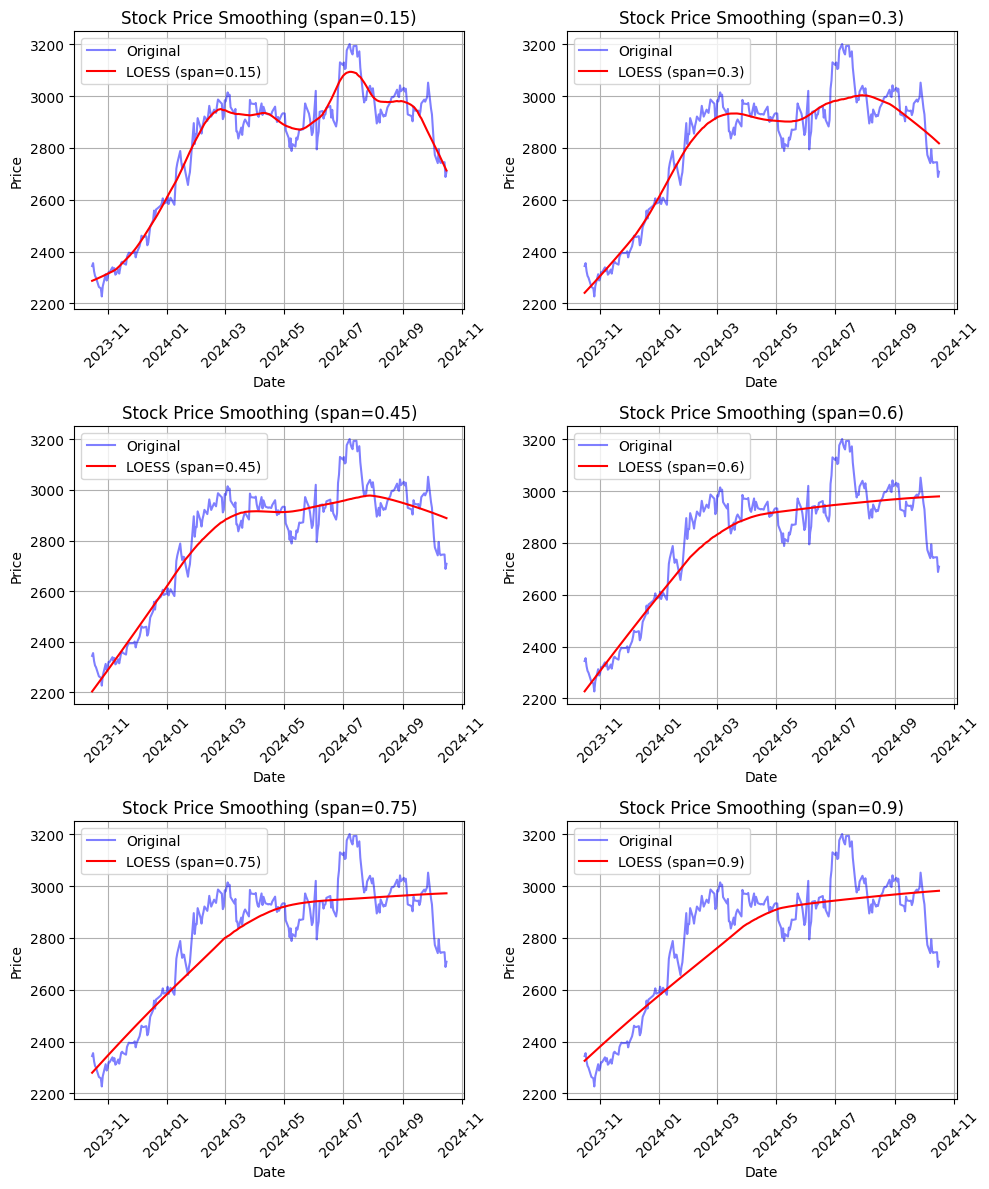

In [40]:
# Define a list of span values to test
spans = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90]

# Create a figure for subplots
plt.figure(figsize=(10, 12))

# Loop through each span and apply LOESS smoothing
for i, span in enumerate(spans, 1):
    # Apply LOESS smoothing
    smoothed = lowess(df['Price'], df['Date'].map(pd.Timestamp.toordinal), frac=span)

    plt.subplot(3, 2, i)

    # Plot original prices
    plt.plot(df['Date'], df['Price'], label='Original', color='blue', alpha=0.5)

    # Plot smoothed prices
    plt.plot(df['Date'], smoothed[:, 1], label=f'LOESS (span={span})', color='red')

    # Labeling the plot
    plt.title(f'Stock Price Smoothing (span={span})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Step 4: Evaluate Performance with MSE
- Calculate Mean Squared Error (MSE) for each span.
- Identify and print the optimal span with the lowest MSE.

In [41]:
mse_values = []

# Calculate MSE for each span
for span in spans:
    smoothed = lowess(df['Price'], df['Date'].map(pd.Timestamp.toordinal), frac=span)
    mse = mean_squared_error(df['Price'], smoothed[:, 1])
    mse_values.append(mse)

# Identify the optimal span based on the lowest MSE
optimal_span_index = np.argmin(mse_values)
optimal_span = spans[optimal_span_index]
print(f"Optimal Span Value: {optimal_span} with MSE: {mse_values[optimal_span_index]}")

Optimal Span Value: 0.15 with MSE: 2414.5639778668515


## Step 5: Apply LOESS with Optimal Span
- Perform LOESS smoothing using the identified optimal span.

In [42]:
smoothed_optimal = lowess(df['Price'], df['Date'].map(pd.Timestamp.toordinal), frac=optimal_span)

## Step 6: Apply Polynomial Smoothing
- Apply linear (degree 1) and quadratic (degree 2) polynomial smoothing.

In [43]:
# Convert dates to numeric for polynomial fitting
date_numeric = df['Date'].map(pd.Timestamp.toordinal)

# Linear Polynomial Smoothing (degree 1)
coeffs_linear = np.polyfit(date_numeric, df['Price'], 1)
poly_linear = np.polyval(coeffs_linear, date_numeric)

# Quadratic Polynomial Smoothing (degree 2)
coeffs_quadratic = np.polyfit(date_numeric, df['Price'], 2)
poly_quadratic = np.polyval(coeffs_quadratic, date_numeric)


## Step 7: Visualize Comparisons
- Plot original prices, LOESS smoothed, and polynomial smoothed prices.

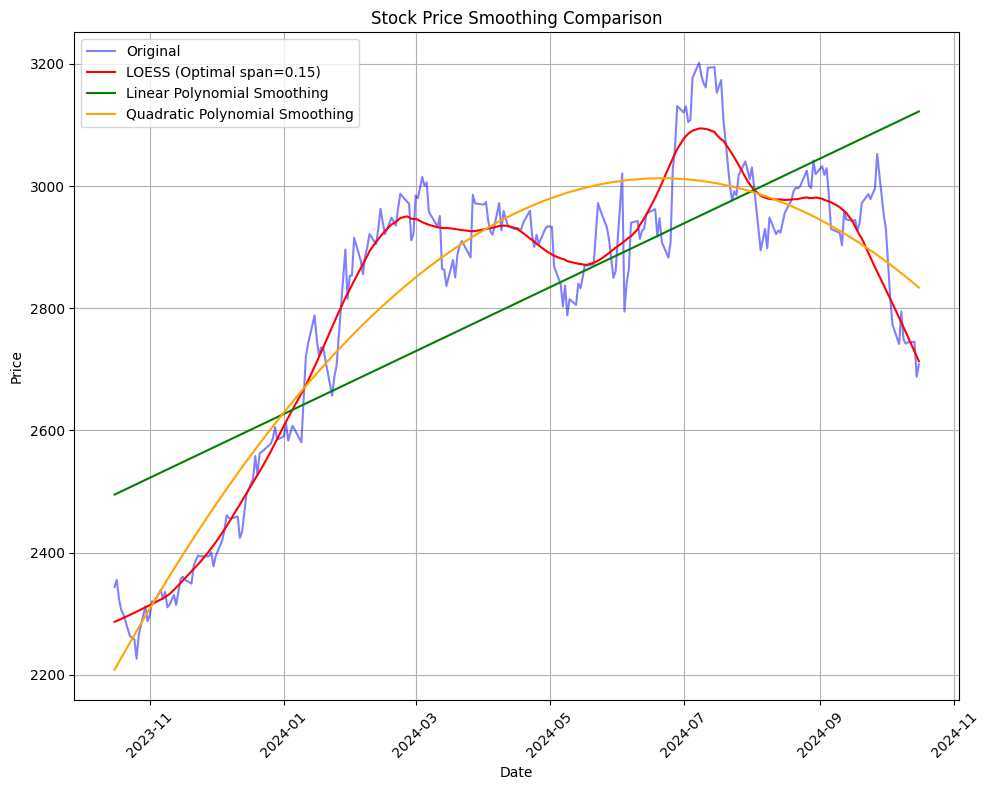

In [44]:
# Create a figure to compare smoothing methods
plt.figure(figsize=(10, 8))

# Original Prices
plt.plot(df['Date'], df['Price'], label='Original', color='blue', alpha=0.5)

# LOESS Smoothing with Optimal Span
plt.plot(df['Date'], smoothed_optimal[:, 1], label=f'LOESS (Optimal span={optimal_span})', color='red')

# Linear Polynomial Smoothing
plt.plot(df['Date'], poly_linear, label='Linear Polynomial Smoothing', color='green')

# Quadratic Polynomial Smoothing
plt.plot(df['Date'], poly_quadratic, label='Quadratic Polynomial Smoothing', color='orange')

# Labeling the plot
plt.title('Stock Price Smoothing Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion
Demonstrate LOESS and polynomial smoothing techniques to analyze stock prices and identify trends.